In [1]:
import numpy as np
import modin.pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import operator
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv('/home/primakov/Public/6th/Social Media and Data Driven /project/dataset/tracks.csv')

In [3]:
len(df)

586672

In [4]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


# The dataset contains the following:

# Primary:
- id (Id of track generated by Spotify)
# Numerical:
- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0)
- speechiness (Ranges from 0 to 1)
# Dummy:
- mode (0 = Minor, 1 = Major)
- explicit (0 = No explicit content, 1 = Explicit content)
# Categorical:
- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
- timesignature (The predicted timesignature, most typically 4)
- artists (List of artists mentioned)
- artists (Ids of mentioned artists)
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
- name (Name of the song)

In [5]:
df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [6]:
df.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [7]:
df0=df.copy()

In [8]:
df0['release_date'] = pd.to_datetime(df0['release_date'])

# Popularity Distribution

In [9]:
df0['popularity'].head()

0    6
1    0
2    0
3    0
4    0
Name: popularity, dtype: int64

In [10]:
print('Maximum popularity value:',df0['popularity'].max())
print('Mean popularity value:',df0['popularity'].mean())

Maximum popularity value: 100
Mean popularity value: 27.570052772247525


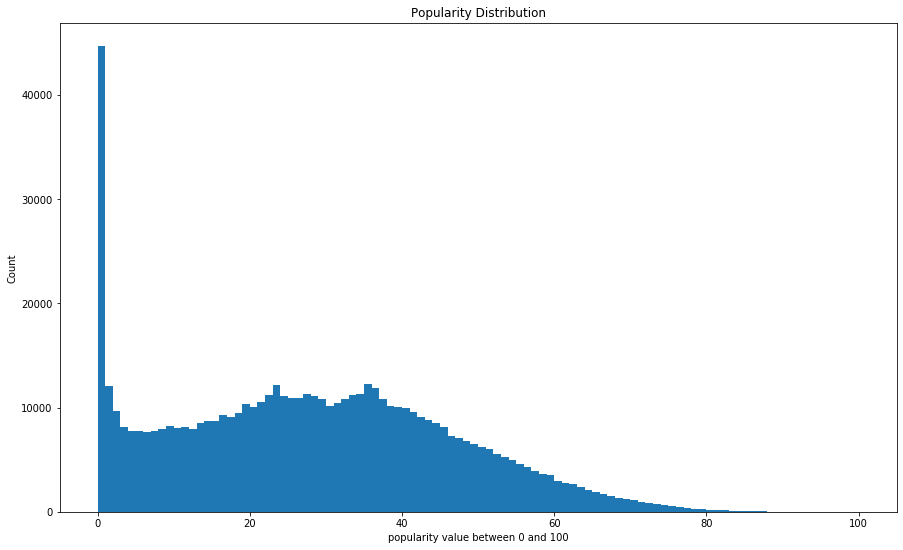

In [11]:
binsize = 1
bins = np.arange(0, df0['popularity'].max()+binsize, binsize)

plt.figure(figsize=[15, 9])
plt.hist(data = df0, x = 'popularity', bins = bins)
plt.title('Popularity Distribution')
plt.xlabel('popularity value between 0 and 100')
plt.ylabel('Count')
plt.show()

# Duration

In [12]:
df0['duration_ms'].head()

0    126903
1     98200
2    181640
3    176907
4    163080
Name: duration_ms, dtype: int64

In [13]:
df0['duration_m']=df0.apply(lambda x: x.duration_ms/(1000*60), axis=1)

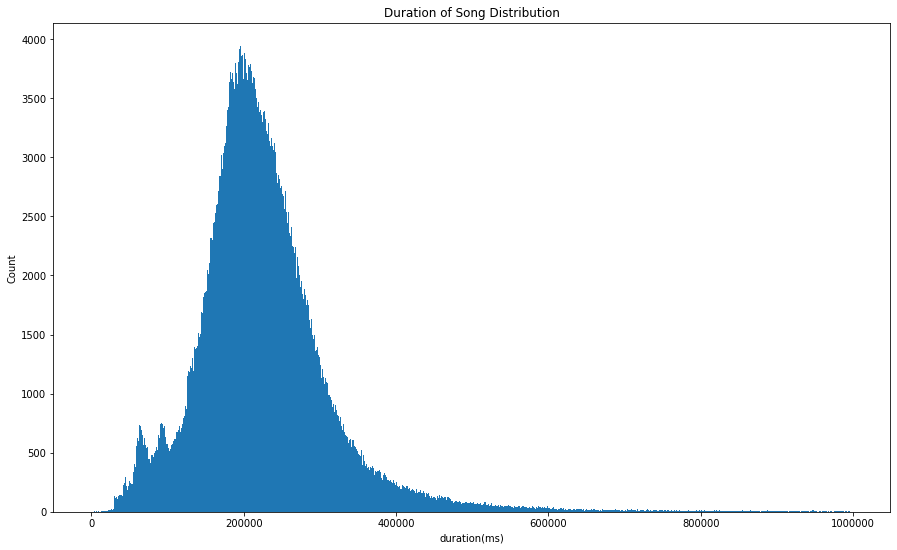

In [14]:
bins = np.arange(0, 1000000, 1000)

plt.figure(figsize=[15, 9])
plt.hist(data = df0, x = 'duration_ms', bins = bins)
plt.title('Duration of Song Distribution')
plt.xlabel('duration(ms)')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Duration of Song(in minutes) Distribution')

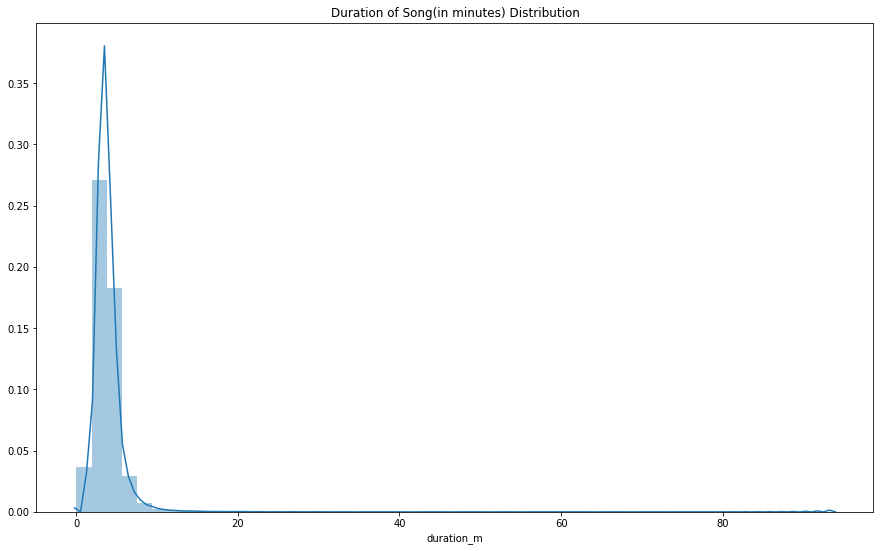

In [15]:
plt.figure(figsize=[15, 9])
sns.distplot(df0['duration_m'])
plt.title('Duration of Song(in minutes) Distribution')

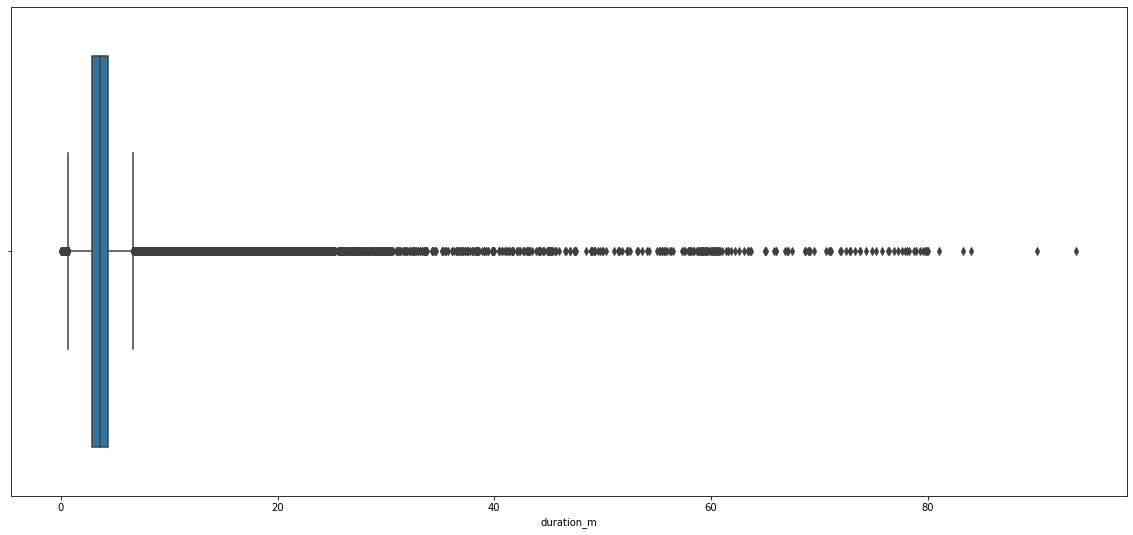

In [16]:
plt.figure(figsize=[20, 9])
sns.boxplot(df0['duration_m'])

In [17]:
df0['songs']=df0['duration_m'].apply(lambda x: 1 if x<8 else 0)

In [18]:
song=df0['songs'].value_counts()

In [19]:
song

1    574370
0     12302
Name: songs, dtype: int64

[Text(0, 0, 'Others'), Text(0, 0, 'Songs')]

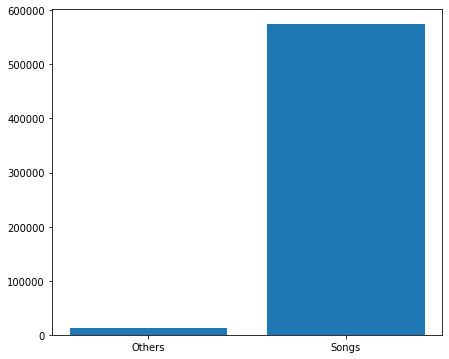

In [20]:
fig, ax=plt.subplots(figsize=(7,6))
ax.bar(song.index, song.values)
ax.set_xticks([0,1])
ax.set_xticklabels(['Others','Songs'])


# Tracks released

In [21]:
df0['release_date'].head()

0   1922-02-22
1   1922-06-01
2   1922-03-21
3   1922-03-21
4   1922-01-01
Name: release_date, dtype: datetime64[ns]

In [22]:
df0['year'] = df0['release_date'].dt.year
df0['month'] = df0['release_date'].dt.month

In [23]:
np.unique(df0['year'])

array([1900, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021])

In [24]:
years=df0['year'].value_counts()

In [25]:
years

2020    13937
1998    12485
1999    12484
1997    12349
1996    12058
        ...  
1925      903
1923      657
1924      633
1922      294
1900        1
Name: year, Length: 101, dtype: int64

Text(0, 0.5, 'Count')

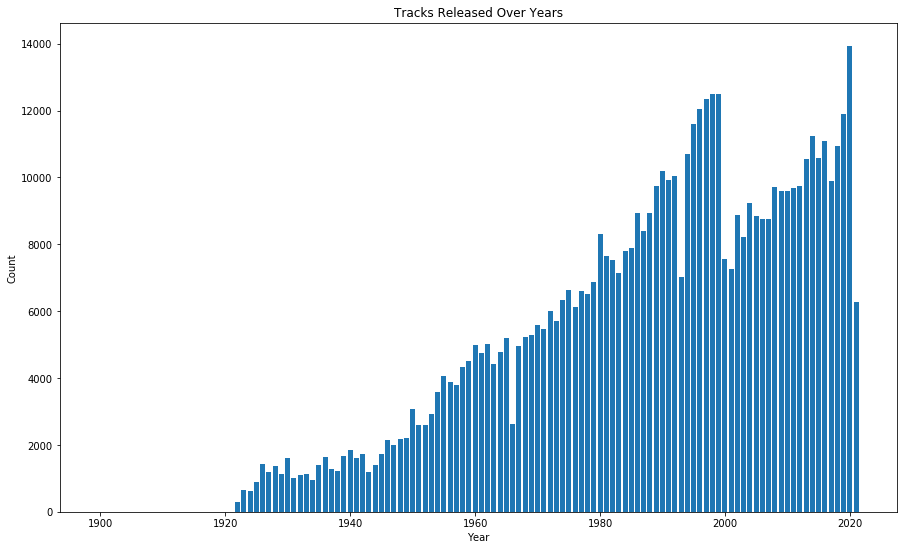

In [26]:
plt.figure(figsize=[15, 9])
plt.bar(years.index, years.values)
plt.title('Tracks Released Over Years')
plt.xlabel('Year')
plt.ylabel('Count')

In [27]:
months=df0['month'].value_counts()

In [28]:
months

1     271776
12     41654
11     33604
10     31559
3      29067
9      28947
6      27668
4      26674
5      25981
7      25070
8      22750
2      21922
Name: month, dtype: int64

Text(0, 0.5, 'Count')

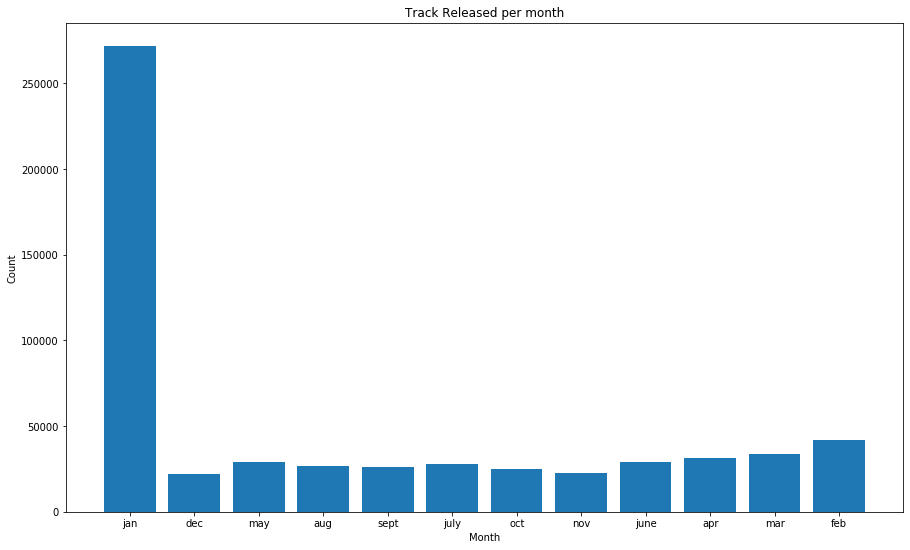

In [29]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.bar((months.index), (months.values))
ax.set_title('Track Released per month')
ax.set_xticks(months.index)
ax.set_xticklabels(['jan','feb','mar','apr','may','june','july','aug','sept','oct','nov','dec'])
ax.set_xlabel('Month')
ax.set_ylabel('Count')

# Popularity

Text(0.5, 0, 'energy (Ranges from 0 to 1)')

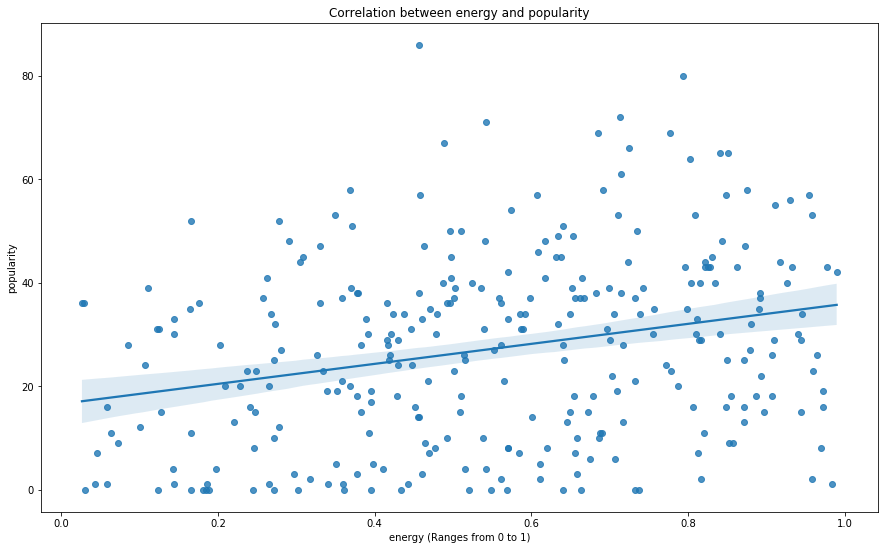

In [30]:
plt.subplots(1,1,figsize=(15,9))
ax1 = sns.regplot(data = df0.sample(300), x = 'energy', y = 'popularity')
ax1.set_title('Correlation between energy and popularity')
ax1.set_xlabel('energy (Ranges from 0 to 1)')

Text(0.5, 0, 'danceability(Ranges from 0 to 1)')

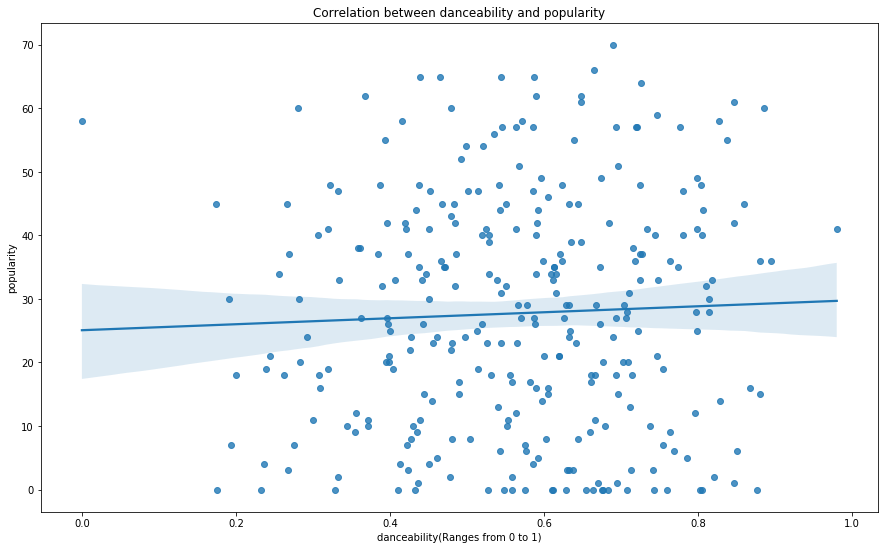

In [31]:
plt.subplots(1,1,figsize=(15,9))
ax1 = sns.regplot(data = df0.sample(300), x = 'danceability', y = 'popularity')
ax1.set_title('Correlation between danceability and popularity')
ax1.set_xlabel('danceability(Ranges from 0 to 1)')

Text(0.5, 0, 'loudness(Ranges from 0 to 1)')

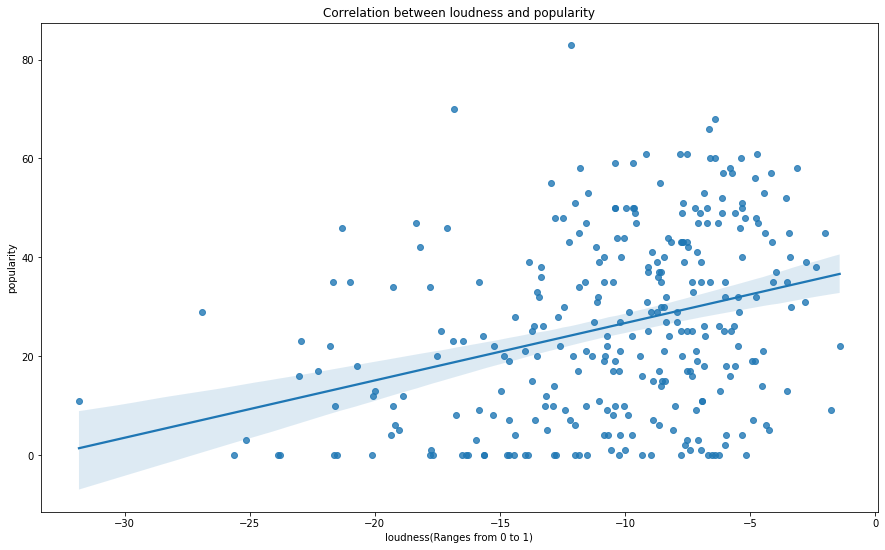

In [32]:
plt.subplots(1,1,figsize=(15,9))
ax1 = sns.regplot(data = df0.sample(300), x = 'loudness', y = 'popularity')
ax1.set_title('Correlation between loudness and popularity')
ax1.set_xlabel('loudness(Ranges from 0 to 1)')

Text(0.5, 0, 'instrumentalness(Ranges from 0 to 1)')

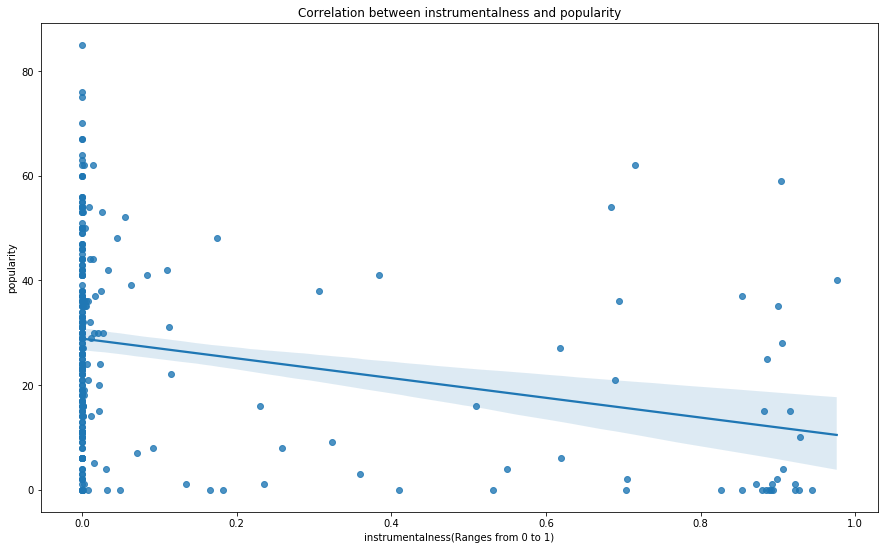

In [33]:
plt.subplots(1,1,figsize=(15,9))
ax1 = sns.regplot(data = df0.sample(300), x = 'instrumentalness', y = 'popularity')
ax1.set_title('Correlation between instrumentalness and popularity')
ax1.set_xlabel('instrumentalness(Ranges from 0 to 1)')

Text(0.5, 0, 'speechiness(Ranges from 0 to 1)')

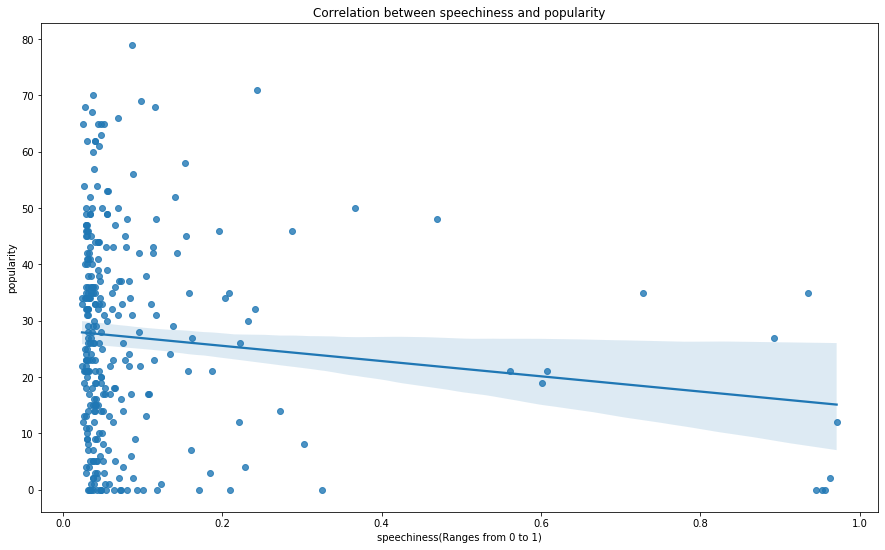

In [34]:
plt.subplots(1,1,figsize=(15,9))
ax1 = sns.regplot(data = df0.sample(300), x = 'speechiness', y = 'popularity')
ax1.set_title('Correlation between speechiness and popularity')
ax1.set_xlabel('speechiness(Ranges from 0 to 1)')

# Audio Characteristics

In [35]:
chr_columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]

In [36]:
def character_plot(item):
    plt.figure(figsize=(15,9))
    sns.set(style='whitegrid')
    x=df0.groupby('year')[item].mean()
    sns.lineplot(x=x.index, y=x, label=item)
    plt.title('Audio characteristics('+str(item)+') over year')
    plt.ylabel('Measure')
    plt.xlabel('Year')   

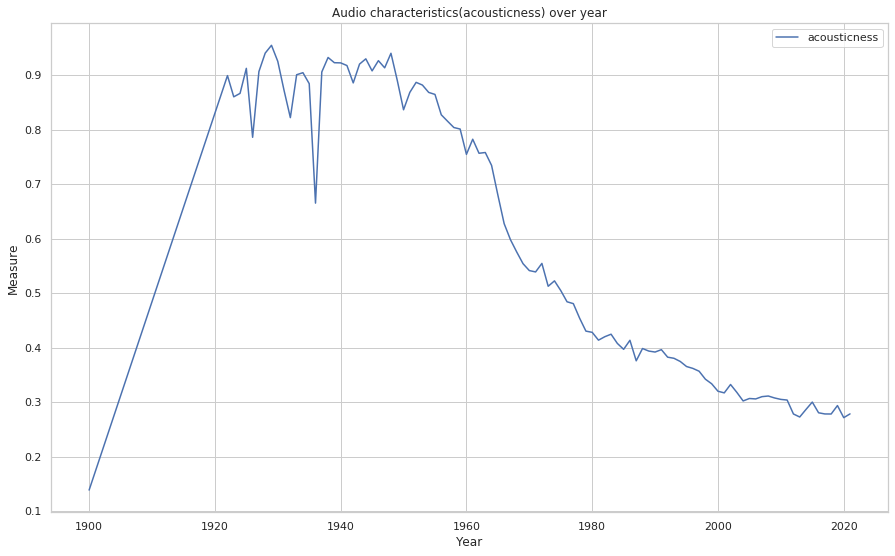

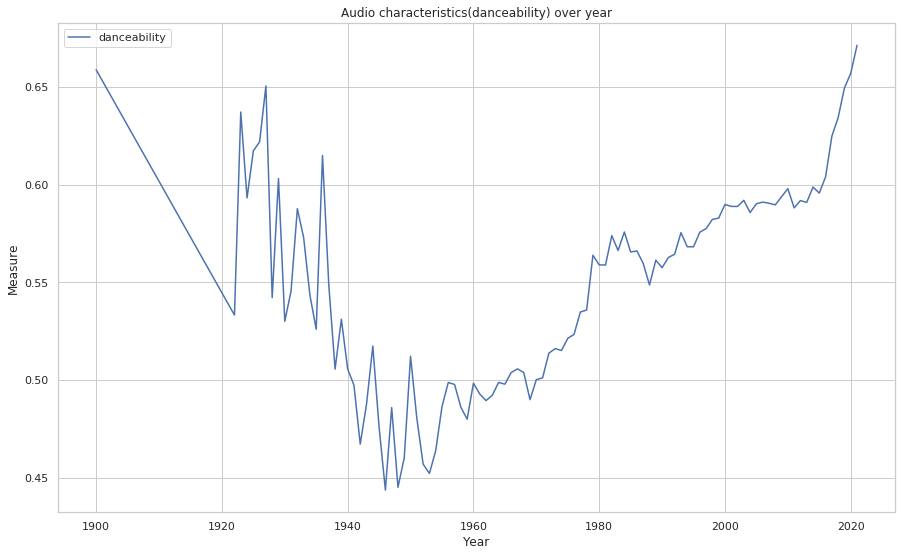

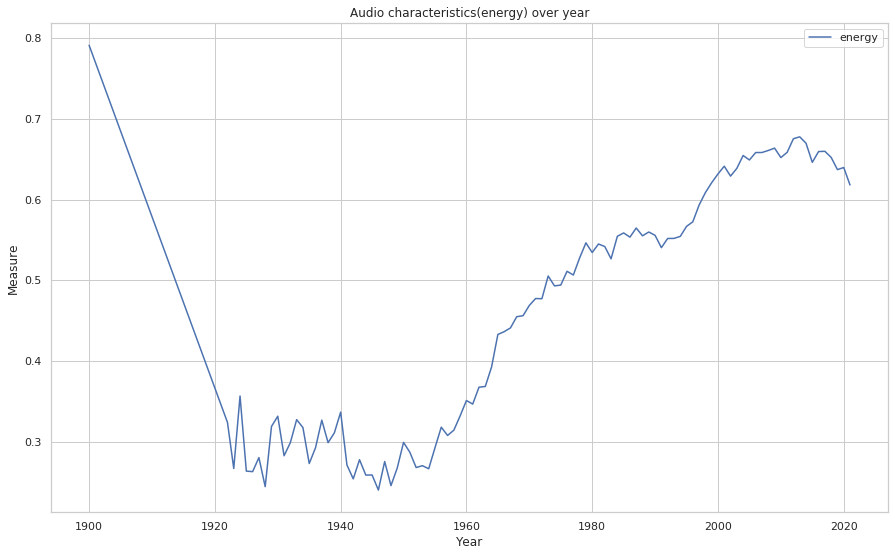

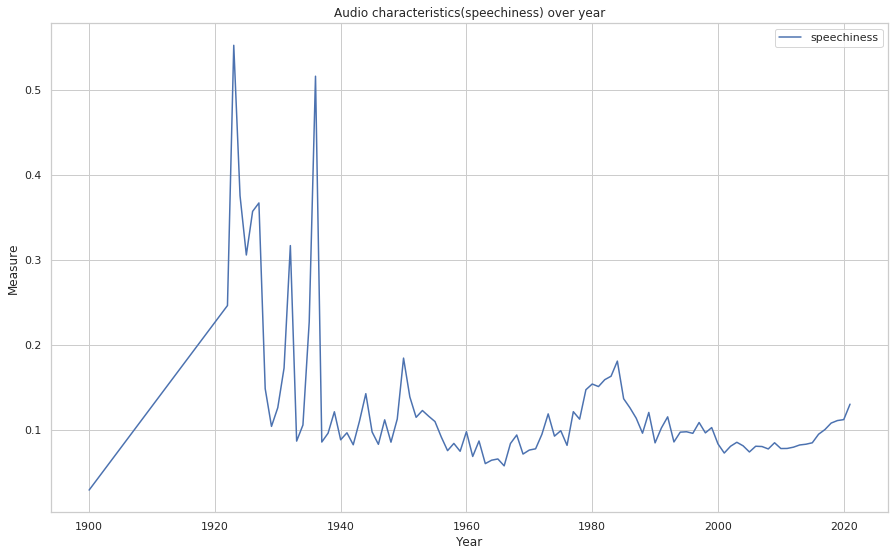

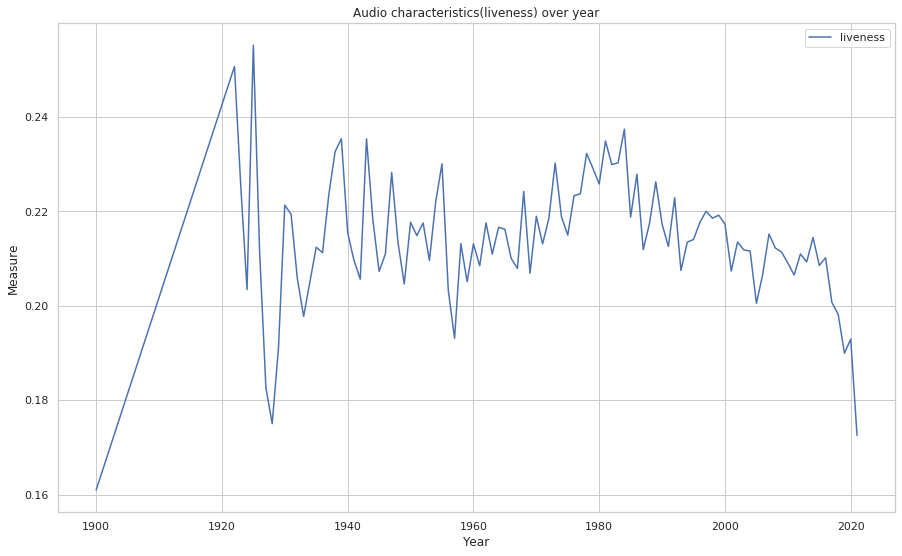

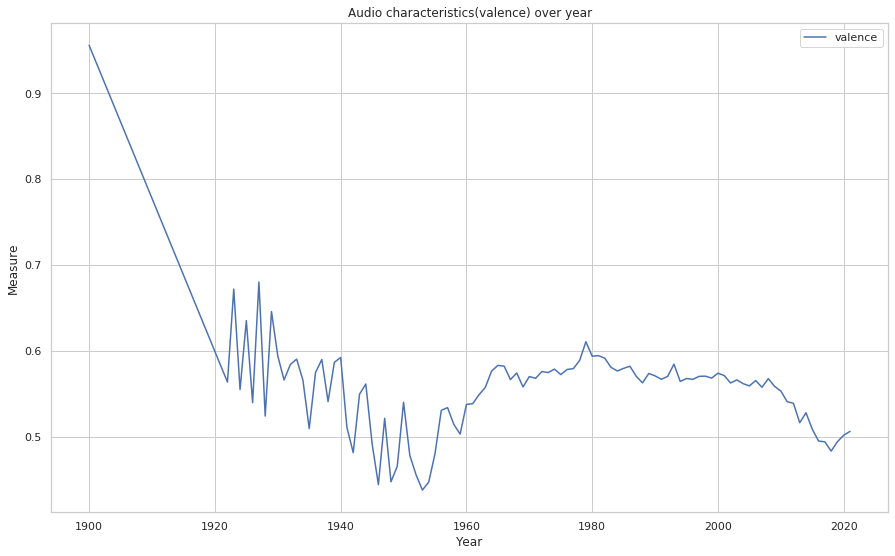

In [37]:
for character in chr_columns:
    character_plot(character)

# Distribution plot of audio characteristics

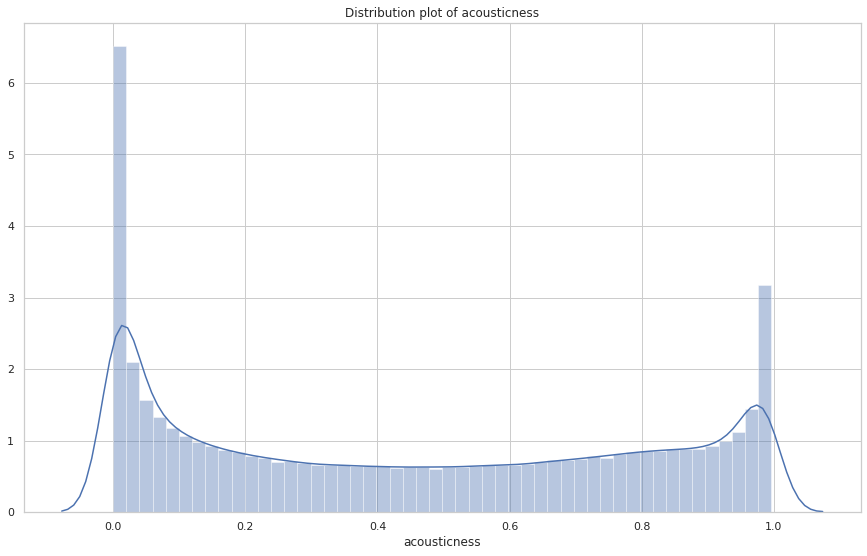

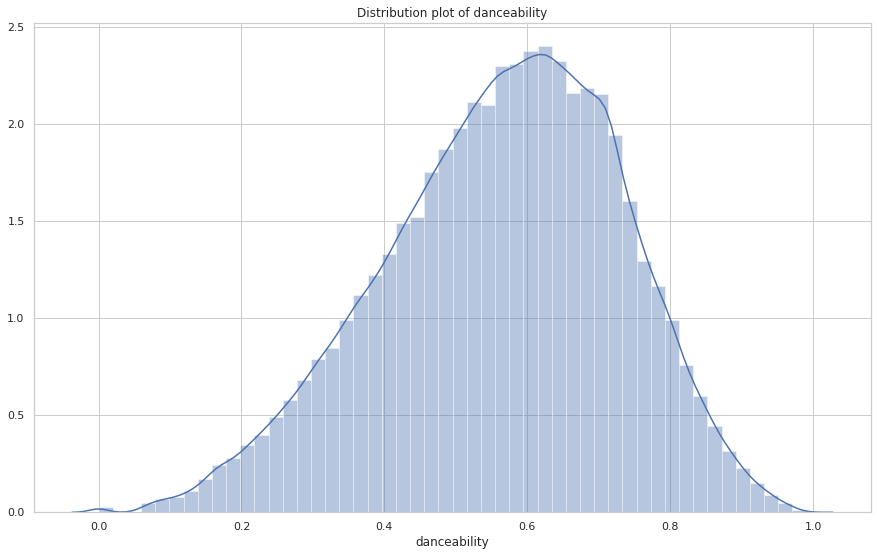

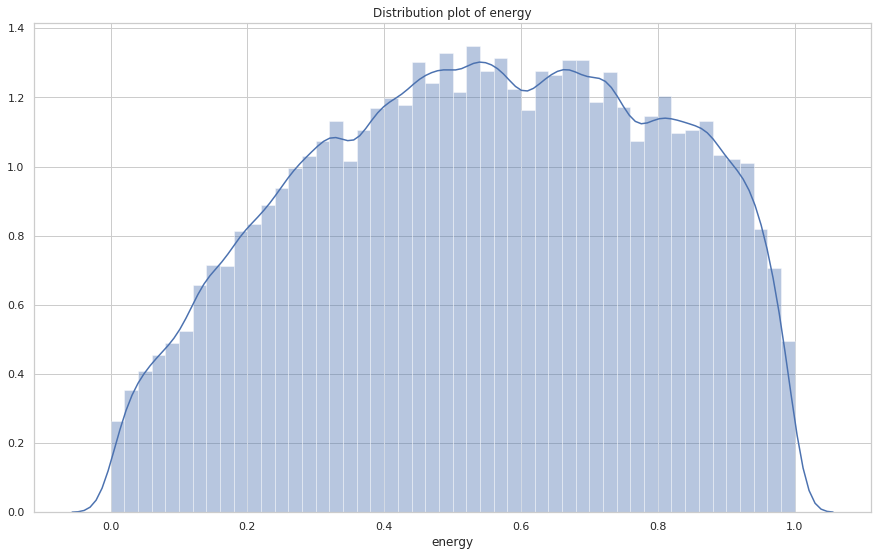

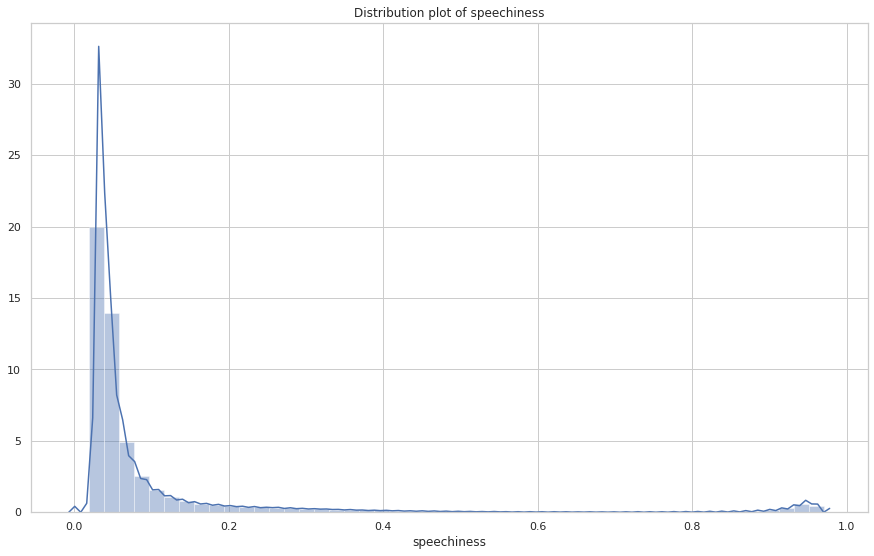

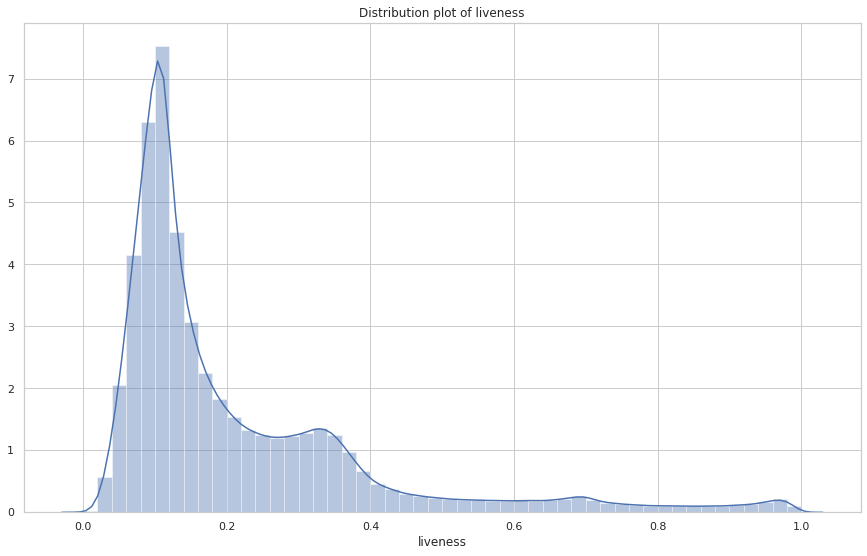

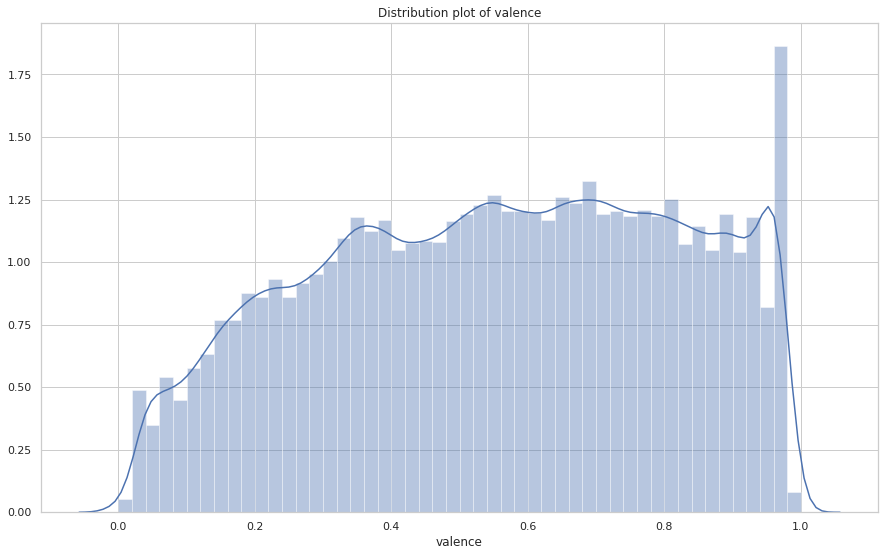

In [38]:
for item in chr_columns:
    plt.figure(figsize=(15,9))
    sns.distplot(df0[item])
    plt.title('Distribution plot of '+str(item))

In [39]:
df_agg=pd.DataFrame()

for character in chr_columns:
    df_agg[character+'_agg']=df0.groupby('year')[character].mean().values

In [40]:
df_agg

,acousticness_agg,danceability_agg,energy_agg,speechiness_agg,liveness_agg,valence_agg
0,0.139000,0.659000,0.791000,0.029500,0.161000,0.956000
1,0.898857,0.533320,0.324054,0.246295,0.250670,0.563605
2,0.859965,0.637332,0.266977,0.552072,0.225396,0.671967
3,0.866266,0.593344,0.356725,0.375208,0.203447,0.554935
4,0.912170,0.617391,0.263749,0.305693,0.255157,0.635196
...,...,...,...,...,...,...
96,0.278547,0.624972,0.659730,0.100517,0.200736,0.493965
97,0.278446,0.634510,0.652202,0.108212,0.198216,0.483251
98,0.293902,0.649724,0.637066,0.111168,0.189971,0.494212
99,0.271750,0.657129,0.639669,0.112279,0.192968,0.501712


In [41]:
corr_matrix=df_agg.corr()

In [42]:
corr_matrix

,acousticness_agg,danceability_agg,energy_agg,speechiness_agg,liveness_agg,valence_agg
acousticness_agg,1.000000,-0.606512,-0.980178,0.297296,0.127009,-0.210881
danceability_agg,-0.606512,1.000000,0.621078,0.317336,-0.292986,0.429467
energy_agg,-0.980178,0.621078,1.000000,-0.364747,-0.146977,0.255014
speechiness_agg,0.297296,0.317336,-0.364747,1.000000,0.137650,0.159048
liveness_agg,0.127009,-0.292986,-0.146977,0.137650,1.000000,-0.073084
valence_agg,-0.210881,0.429467,0.255014,0.159048,-0.073084,1.000000


# Heatmap of the audio characteristics

[Text(0, 0.5, 'acousticness_agg'),
 Text(0, 1.5, 'danceability_agg'),
 Text(0, 2.5, 'energy_agg'),
 Text(0, 3.5, 'speechiness_agg'),
 Text(0, 4.5, 'liveness_agg'),
 Text(0, 5.5, 'valence_agg')]

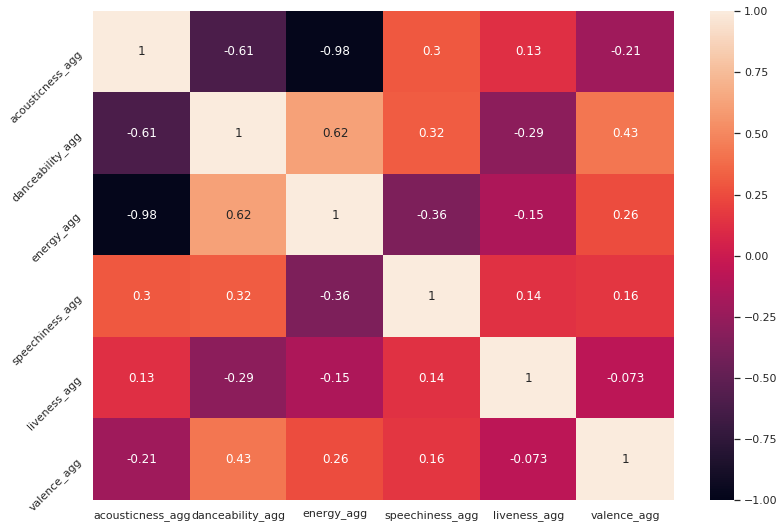

In [43]:
plt.figure(figsize=(13,9))
heatmap=sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
heatmap.set_xticklabels(df_agg.columns)
heatmap.set_yticklabels(df_agg.columns, rotation=45)

In [44]:
df0['loudness_range'] = pd.qcut(df0['loudness'], q=4)

In [45]:
df0['loudness_range']

0         (-60.001, -12.891]
1         (-60.001, -12.891]
2         (-60.001, -12.891]
3         (-60.001, -12.891]
4         (-60.001, -12.891]
                 ...        
586667      (-9.243, -6.482]
586668       (-6.482, 5.376]
586669     (-12.891, -9.243]
586670       (-6.482, 5.376]
586671      (-9.243, -6.482]
Name: loudness_range, Length: 586672, dtype: object

# "popularity" VS some characteristics by "years" and with size "loudness_range"

[Text(0.5, 1.0, 'danceability')]

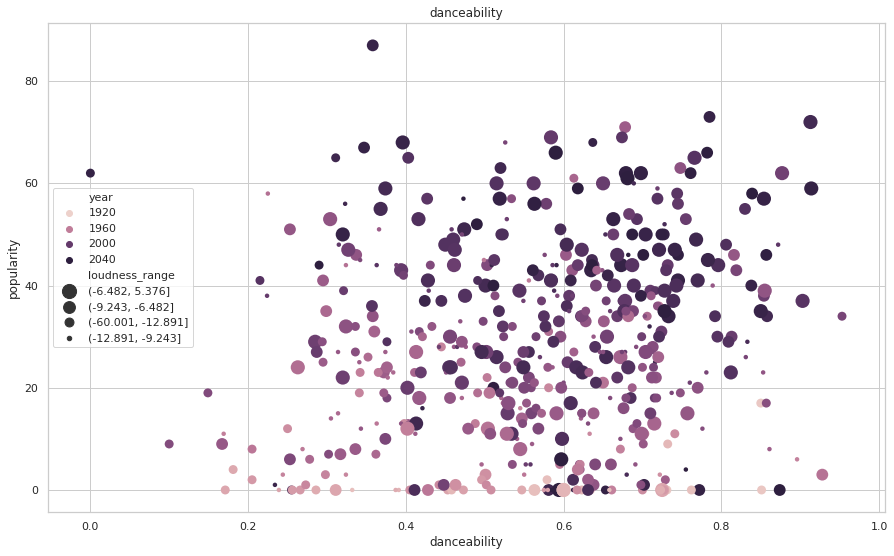

In [46]:
plt.figure(figsize=(15,9))
sns.scatterplot(x="danceability", y="popularity",
                hue="year",size='loudness_range',
                sizes=(20, 200), linewidth=0,
                data=df0.sample(500)).set(title='danceability')

[Text(0.5, 1.0, 'energy')]

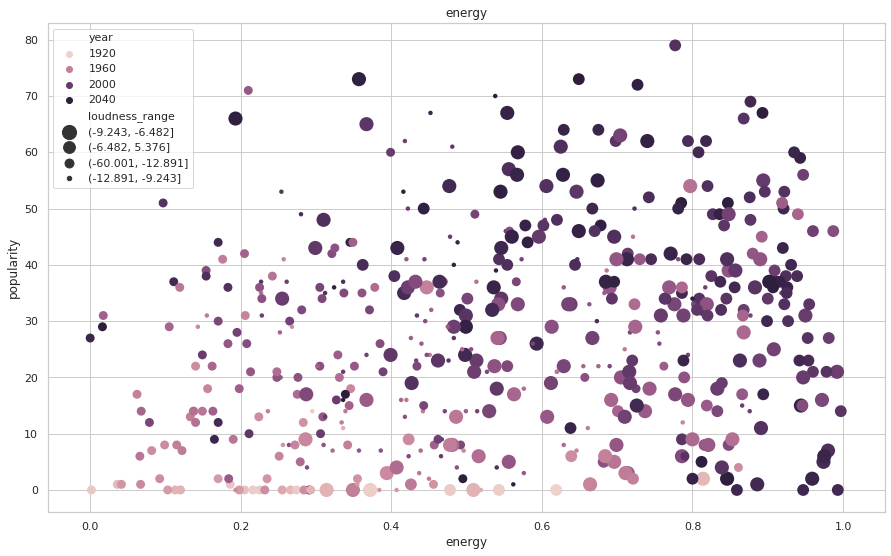

In [47]:
plt.figure(figsize=(15,9))
sns.scatterplot(x="energy", y="popularity",
                hue="year",size='loudness_range',
                sizes=(20, 200), linewidth=0,
                data=df0.sample(500)).set(title='energy')

In [48]:
df0['explicit'].value_counts()

0    560808
1     25864
Name: explicit, dtype: int64

Text(0, 0.5, 'Count')

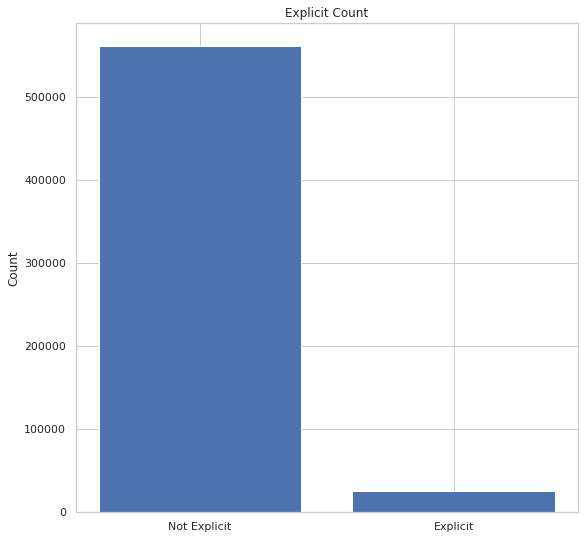

In [49]:
fig, ax = plt.subplots(figsize=(9, 9))
ax.bar(df0['explicit'].value_counts().index, df0['explicit'].value_counts().values)
plt.title('Explicit Count')
ax.set_xticks([0,1])
ax.set_xticklabels(['Not Explicit','Explicit'])
ax.set_ylabel('Count')

In [50]:
df_ex=df0.groupby('explicit').get_group(1)

In [51]:
df_ex.groupby('year')['explicit'].sum()

year
1923       1
1924       1
1927      12
1929       9
1930       5
        ... 
2017    1691
2018    2077
2019    2559
2020    3038
2021    1637
Name: explicit, Length: 76, dtype: int64

Text(0, 0.5, 'count')

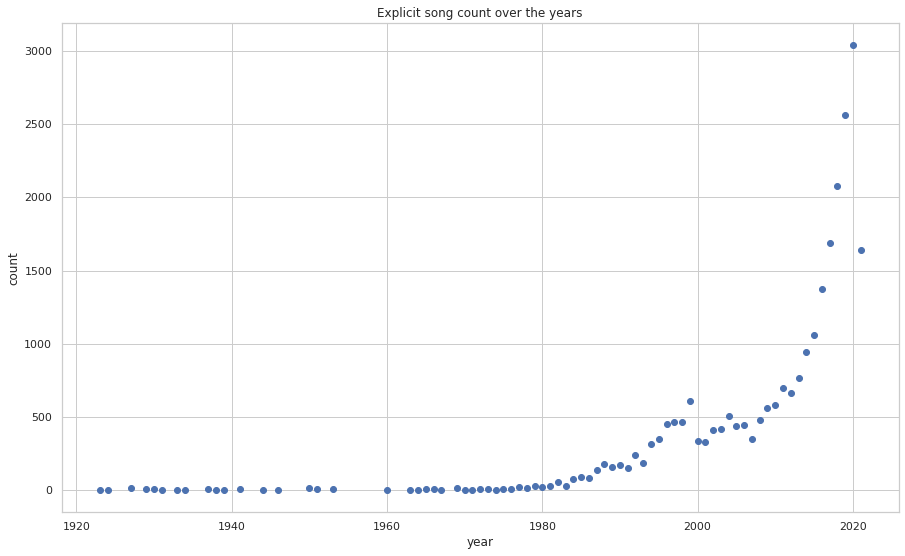

In [52]:
plt.figure(figsize=(15,9))
plt.scatter(df_ex.groupby('year')['explicit'].sum().index,df_ex.groupby('year')['explicit'].sum().values)
plt.title('Explicit song count over the years')
plt.xlabel('year')
plt.ylabel('count')